In [1]:
    import numpy as np
    import pandas as pd
    import itertools

# Import the dataset

In [2]:
    #Read the data
    df=pd.read_csv('data.csv')
    #Get head
    df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [3]:
    #DataFrame - Get the labels
    labels=df.Label
    labels.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [4]:
    #Get shape
    df.shape

(4009, 4)

In [5]:
df.groupby('Label').describe()

URLs                                                                 \
      count unique                                                top freq   
Label                                                                        
0      2137   1588  http://beforeitsnews.com/u-s-politics/2017/10/...    5   
1      1872   1764     http://www.bbc.com/sport/football/41472696\r\n    4   

      Headline                                                                 \
         count unique                                                top freq   
Label                                                                           
0         2137   1226  10/5 Expo Park-Forbes Field: Bucs Win '60 Open...    6   
1         1872   1605  World Cup 2018: Who needs what to qualify for ...    5   

       Body                                                                 
      count unique                                                top freq  
Label                                                                       
0      2120   1193  A Potato Battery Can Light up a Room for Over ...  143  
1      1868   1670  Chat with us in Facebook Messenger. Find out w...   61

#                                                    Data Preprocessing

### Handle missing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
URLs        4009 non-null object
Headline    4009 non-null object
Body        3988 non-null object
Label       4009 non-null int64
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [7]:
df_x=df["Headline"]
df_y=df["Label"]

In [8]:
df_x
df_y

0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64

###  Text Preprocessing

In [9]:
#Once the dataset has been imported, the next step is to preprocess the text. Text may contain numbers, special characters, 
#and unwanted spaces. Depending upon the problem we face, we may or may not need to remove these special characters and 
#numbers from text.

documents = []
from nltk.stem import WordNetLemmatizer
import re
#Regex Expressions from Python re library 
import nltk
#nltk.download('wordnet')



stemmer = WordNetLemmatizer()

for sen in range(0, len(df_x)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(df_x[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

## TfidfVectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words='english')
#1500 most occurring words as features
#min_df=5. minimum number of row that should contain this feature. include those words that occur in at least 5 rows. 
#0.7 means that we should include only those words that occur in a maximum of 70% of all the rows
df_x = tfidfconverter.fit_transform(documents).toarray()
#Term frequency = (Number of Occurrences of a word)/(Total words in the document)
#IDF(word) = Log((Total number of documents)/(Number of documents containing the word))

In [11]:
df_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Training and Testing Sets Split


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=7)
#The above script divides data into 20% test set and 80% training set
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Creating Model with Supervised Learning

## RandomForest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.cm as cm

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

print(classification_report(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       434
           1       0.89      0.82      0.85       368

    accuracy                           0.87       802
   macro avg       0.87      0.87      0.87       802
weighted avg       0.87      0.87      0.87       802

Accuracy: 0.8690773067331671


## KNN algorithm 

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
#k=5
classifier.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[355  79]
 [151 217]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       434
           1       0.73      0.59      0.65       368

    accuracy                           0.71       802
   macro avg       0.72      0.70      0.70       802
weighted avg       0.72      0.71      0.71       802

Accuracy: 0.713216957605985


### Comparing Error Rate with the K Value

In [16]:
#we will plot the mean error for the predicted values of test set for all the K values between 1 and 40
#K ranges from 1 and 40

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))


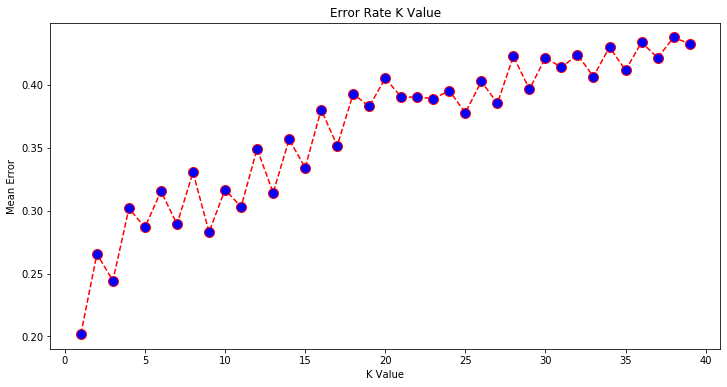

In [17]:
#plot the error values against K values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

##  SVM 

In [18]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

y_pred = svclassifier.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[377  57]
 [ 94 274]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       434
           1       0.83      0.74      0.78       368

    accuracy                           0.81       802
   macro avg       0.81      0.81      0.81       802
weighted avg       0.81      0.81      0.81       802

Accuracy: 0.8117206982543641


## Kernel SVM

### 1.Polynomial Kernel

In [19]:
svclassifier = SVC(kernel='poly', degree=8)
#degree of the polynomial
svclassifier.fit(x_train, y_train)

y_pred = svclassifier.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[238 196]
 [ 18 350]]
              precision    recall  f1-score   support

           0       0.93      0.55      0.69       434
           1       0.64      0.95      0.77       368

    accuracy                           0.73       802
   macro avg       0.79      0.75      0.73       802
weighted avg       0.80      0.73      0.72       802

Accuracy: 0.7331670822942643


### 2. Gaussian Kernel

In [20]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

y_pred = svclassifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[361  73]
 [ 52 316]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       434
           1       0.81      0.86      0.83       368

    accuracy                           0.84       802
   macro avg       0.84      0.85      0.84       802
weighted avg       0.85      0.84      0.84       802

Accuracy: 0.844139650872818


### 3. Sigmoid Kernel

In [21]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train, y_train)

y_pred = svclassifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[367  67]
 [ 85 283]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       434
           1       0.81      0.77      0.79       368

    accuracy                           0.81       802
   macro avg       0.81      0.81      0.81       802
weighted avg       0.81      0.81      0.81       802

Accuracy: 0.8104738154613467


## DecisionTree

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [23]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
414,1,0
378,0,0
658,0,1
590,0,0
1602,1,0
...,...,...
3958,1,1
3123,0,0
2682,0,0
3875,0,1


In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.18952618453865336
Mean Squared Error: 0.18952618453865336
Root Mean Squared Error: 0.4353460514793414
Accuracy: 0.8104738154613467


##  Naive Bayes

### 1. Bernoulli  

In [25]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[315 119]
 [ 45 323]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.79       434
           1       0.73      0.88      0.80       368

    accuracy                           0.80       802
   macro avg       0.80      0.80      0.80       802
weighted avg       0.81      0.80      0.80       802

Accuracy: 0.7955112219451371


### 2. Gaussian 

In [26]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[274 160]
 [ 43 325]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73       434
           1       0.67      0.88      0.76       368

    accuracy                           0.75       802
   macro avg       0.77      0.76      0.75       802
weighted avg       0.78      0.75      0.74       802

Accuracy: 0.7468827930174564


##  Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred=logreg.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[373  61]
 [ 83 285]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       434
           1       0.82      0.77      0.80       368

    accuracy                           0.82       802
   macro avg       0.82      0.82      0.82       802
weighted avg       0.82      0.82      0.82       802

Accuracy: 0.8204488778054863


## Linear Discriminant Analysis -- LDA

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)


y_pred=lda.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[363  71]
 [ 98 270]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       434
           1       0.79      0.73      0.76       368

    accuracy                           0.79       802
   macro avg       0.79      0.79      0.79       802
weighted avg       0.79      0.79      0.79       802

Accuracy: 0.7892768079800498


C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## PassiveAggressiveClassifier

In [29]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[353  81]
 [ 71 297]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       434
           1       0.79      0.81      0.80       368

    accuracy                           0.81       802
   macro avg       0.81      0.81      0.81       802
weighted avg       0.81      0.81      0.81       802

Accuracy: 0.8104738154613467


## GradientBoostingClassifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[405  29]
 [181 187]]
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       434
           1       0.87      0.51      0.64       368

    accuracy                           0.74       802
   macro avg       0.78      0.72      0.72       802
weighted avg       0.77      0.74      0.72       802

Accuracy: 0.7381546134663342
